# Chapter 5 - Exercise 4: Phân tích dữ liệu Xe hơi

**Phân tích dữ liệu giá xe hơi (auto.csv) được bán ra và các đặc điểm kỹ thuật của xe hơi (dữ liệu thu thập năm 1987)** 


#### Thực hiện các yêu cầu sau, và đối chiếu với kết quả cho trước:

In [1393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1394]:
# Cho tập tin dữ liệu auto.csv, và list headers sau:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type","num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

### Phần 1: Đọc và xử lý dữ liệu

In [1395]:
# Câu 1: Đọc dữ liệu từ tập tin auto.csv, kết hợp với list headers đã cho để tạo thành dataframe df có tiêu đề hoàn chỉnh.

df = pd.read_csv('auto.csv',names=headers)

Ý nghĩa 1 số cột:
* **body-style**: Sedan (thân xe có ba khoang riêng biệt, 4 cửa, 4-5 chỗ ngồi), Coupe (dòng xe 2 cửa thể thao, có 4 chỗ ngồi, luôn thể hiện được sức mạnh của động cơ), Convertible (là một kiểu Sedan hoặc Coupe, nhưng nó có khả năng thu gọn mui lại thành một chiếc mui trần), ...
* **drive-wheels**: kiểu dẫn động trên xe gồm dẫn động cầu trước (Front-Wheel Drive), dẫn động cầu sau (Rear-Wheel Drive), dẫn động 4 bánh toàn thời gian (All-Wheel Drive), dẫn động 4 bánh bán thời gian (Four-Wheel Drive).
* **wheel-base**: Chiều dài cơ sở của xe được tính từ điểm tiếp xúc của trục bánh trước của xe tới mặt đường đến tiếp xúc của trục bánh sau của xe với mặt đường.
* **curb-weight**: Trọng lượng bản thân xe không tải
* **bore**: Đường kính buồng đốt 
* **stroke**: Hành trình piston
* **peak-rpm**: Vòng tua tối đa
* **city-mpg**: Mức tiêu hao nhiên liệu của xe trong thành phố
* **highway-mpg**: Mức tiêu hao nhiên liệu của xe khi chạy cao tốc


In [1396]:
# Liệt kê kiểu dữ liệu các cột của df
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object</pre>
  
</details>

In [1397]:
# Liệt kê 5 dòng dữ liệu đầu tiên (head) của df
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>symboling</th>
      <th>normalized-losses</th>
      <th>make</th>
      <th>fuel-type</th>
      <th>aspiration</th>
      <th>num-of-doors</th>
      <th>body-style</th>
      <th>drive-wheels</th>
      <th>engine-location</th>
      <th>wheel-base</th>
      <th>...</th>
      <th>engine-size</th>
      <th>fuel-system</th>
      <th>bore</th>
      <th>stroke</th>
      <th>compression-ratio</th>
      <th>horsepower</th>
      <th>peak-rpm</th>
      <th>city-mpg</th>
      <th>highway-mpg</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>3</td>
      <td>?</td>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>std</td>
      <td>two</td>
      <td>convertible</td>
      <td>rwd</td>
      <td>front</td>
      <td>88.6</td>
      <td>...</td>
      <td>130</td>
      <td>mpfi</td>
      <td>3.47</td>
      <td>2.68</td>
      <td>9.0</td>
      <td>111</td>
      <td>5000</td>
      <td>21</td>
      <td>27</td>
      <td>13495</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>?</td>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>std</td>
      <td>two</td>
      <td>convertible</td>
      <td>rwd</td>
      <td>front</td>
      <td>88.6</td>
      <td>...</td>
      <td>130</td>
      <td>mpfi</td>
      <td>3.47</td>
      <td>2.68</td>
      <td>9.0</td>
      <td>111</td>
      <td>5000</td>
      <td>21</td>
      <td>27</td>
      <td>16500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>?</td>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>std</td>
      <td>two</td>
      <td>hatchback</td>
      <td>rwd</td>
      <td>front</td>
      <td>94.5</td>
      <td>...</td>
      <td>152</td>
      <td>mpfi</td>
      <td>2.68</td>
      <td>3.47</td>
      <td>9.0</td>
      <td>154</td>
      <td>5000</td>
      <td>19</td>
      <td>26</td>
      <td>16500</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>164</td>
      <td>audi</td>
      <td>gas</td>
      <td>std</td>
      <td>four</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
      <td>99.8</td>
      <td>...</td>
      <td>109</td>
      <td>mpfi</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>10.0</td>
      <td>102</td>
      <td>5500</td>
      <td>24</td>
      <td>30</td>
      <td>13950</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>164</td>
      <td>audi</td>
      <td>gas</td>
      <td>std</td>
      <td>four</td>
      <td>sedan</td>
      <td>4wd</td>
      <td>front</td>
      <td>99.4</td>
      <td>...</td>
      <td>136</td>
      <td>mpfi</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>8.0</td>
      <td>115</td>
      <td>5500</td>
      <td>18</td>
      <td>22</td>
      <td>17450</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 26 columns</p>
</div></div>
  
</details>

In [1398]:
# Câu 2: Trong tập dữ liệu, có một số dữ liệu bị thiếu đi kèm với dấu ? , bạn hãy thay thế các dữ liệu này thành NaN
df.replace('?', np.NaN,inplace=True)

# In lại 5 dòng dữ liệu đầu tiên của df
df.head()
df.isna().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>symboling</th>
      <th>normalized-losses</th>
      <th>make</th>
      <th>fuel-type</th>
      <th>aspiration</th>
      <th>num-of-doors</th>
      <th>body-style</th>
      <th>drive-wheels</th>
      <th>engine-location</th>
      <th>wheel-base</th>
      <th>...</th>
      <th>engine-size</th>
      <th>fuel-system</th>
      <th>bore</th>
      <th>stroke</th>
      <th>compression-ratio</th>
      <th>horsepower</th>
      <th>peak-rpm</th>
      <th>city-mpg</th>
      <th>highway-mpg</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>3</td>
      <td>NaN</td>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>std</td>
      <td>two</td>
      <td>convertible</td>
      <td>rwd</td>
      <td>front</td>
      <td>88.6</td>
      <td>...</td>
      <td>130</td>
      <td>mpfi</td>
      <td>3.47</td>
      <td>2.68</td>
      <td>9.0</td>
      <td>111</td>
      <td>5000</td>
      <td>21</td>
      <td>27</td>
      <td>13495</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>NaN</td>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>std</td>
      <td>two</td>
      <td>convertible</td>
      <td>rwd</td>
      <td>front</td>
      <td>88.6</td>
      <td>...</td>
      <td>130</td>
      <td>mpfi</td>
      <td>3.47</td>
      <td>2.68</td>
      <td>9.0</td>
      <td>111</td>
      <td>5000</td>
      <td>21</td>
      <td>27</td>
      <td>16500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>NaN</td>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>std</td>
      <td>two</td>
      <td>hatchback</td>
      <td>rwd</td>
      <td>front</td>
      <td>94.5</td>
      <td>...</td>
      <td>152</td>
      <td>mpfi</td>
      <td>2.68</td>
      <td>3.47</td>
      <td>9.0</td>
      <td>154</td>
      <td>5000</td>
      <td>19</td>
      <td>26</td>
      <td>16500</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>164</td>
      <td>audi</td>
      <td>gas</td>
      <td>std</td>
      <td>four</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
      <td>99.8</td>
      <td>...</td>
      <td>109</td>
      <td>mpfi</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>10.0</td>
      <td>102</td>
      <td>5500</td>
      <td>24</td>
      <td>30</td>
      <td>13950</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>164</td>
      <td>audi</td>
      <td>gas</td>
      <td>std</td>
      <td>four</td>
      <td>sedan</td>
      <td>4wd</td>
      <td>front</td>
      <td>99.4</td>
      <td>...</td>
      <td>136</td>
      <td>mpfi</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>8.0</td>
      <td>115</td>
      <td>5500</td>
      <td>18</td>
      <td>22</td>
      <td>17450</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 26 columns</p>
</div></div>
  
</details>

In [1399]:
# Câu 3: Đổi kiểu dữ liệu các cột thành kiểu dữ liệu đúng theo mô tả sau
# 1. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, porsche,...
# 2. fuel-type: diesel, gas.
# 3. num-of-doors: four, two.
# 4. body-style: hardtop, wagon, sedan, hatchback, convertible.
# 5. drive-wheels: 4wd, fwd, rwd.
# 6. engine-location: front, rear.
# 7. wheel-base: continuous from 86.6 120.9.
# 8. length: continuous from 141.1 to 208.1.
# 9. width: continuous from 60.3 to 72.3.
# 10. height: continuous from 47.8 to 59.8.
# 11. curb-weight: continuous from 1488 to 4066.
# 12. engine-size: continuous from 61 to 326.
# 13. bore: continuous from 2.54 to 3.94.
# 14. stroke: continuous from 2.07 to 4.17.
# 15. horsepower: continuous from 48 to 288.
# 16. peak-rpm: continuous from 4150 to 6600.
# 17. city-mpg: continuous from 13 to 49.
# 18. highway-mpg: continuous from 16 to 54.
# 19. price: continuous from 5118 to 45400.


In [1400]:
# In lại kiểu dữ liệu các cột của df

df[['price','bore','stroke','horsepower','peak-rpm']]=df[['price','bore','stroke','horsepower','peak-rpm']].astype(float)
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object</pre>
  
</details>

In [1401]:
# Câu 4: Xóa bỏ các cột không cần thiết,chỉ giữ lại các cột:
# "make","fuel-type","num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height",
# "curb-weight","engine-size","bore","stroke","horsepower","peak-rpm","city-mpg","highway-mpg","price"
df2=df[["make","fuel-type","num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-size","bore","stroke","horsepower","peak-rpm","city-mpg","highway-mpg","price"]]
df2.dtypes

make                object
fuel-type           object
num-of-doors        object
body-style          object
drive-wheels        object
engine-location     object
wheel-base         float64
length             float64
width              float64
height             float64
curb-weight          int64
engine-size          int64
bore               float64
stroke             float64
horsepower         float64
peak-rpm           float64
city-mpg             int64
highway-mpg          int64
price              float64
dtype: object

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>make</th>
      <th>fuel-type</th>
      <th>num-of-doors</th>
      <th>body-style</th>
      <th>drive-wheels</th>
      <th>engine-location</th>
      <th>wheel-base</th>
      <th>length</th>
      <th>width</th>
      <th>height</th>
      <th>curb-weight</th>
      <th>engine-size</th>
      <th>bore</th>
      <th>stroke</th>
      <th>horsepower</th>
      <th>peak-rpm</th>
      <th>city-mpg</th>
      <th>highway-mpg</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>two</td>
      <td>convertible</td>
      <td>rwd</td>
      <td>front</td>
      <td>88.6</td>
      <td>168.8</td>
      <td>64.1</td>
      <td>48.8</td>
      <td>2548</td>
      <td>130</td>
      <td>3.47</td>
      <td>2.68</td>
      <td>111.0</td>
      <td>5000.0</td>
      <td>21</td>
      <td>27</td>
      <td>13495.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>two</td>
      <td>convertible</td>
      <td>rwd</td>
      <td>front</td>
      <td>88.6</td>
      <td>168.8</td>
      <td>64.1</td>
      <td>48.8</td>
      <td>2548</td>
      <td>130</td>
      <td>3.47</td>
      <td>2.68</td>
      <td>111.0</td>
      <td>5000.0</td>
      <td>21</td>
      <td>27</td>
      <td>16500.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>two</td>
      <td>hatchback</td>
      <td>rwd</td>
      <td>front</td>
      <td>94.5</td>
      <td>171.2</td>
      <td>65.5</td>
      <td>52.4</td>
      <td>2823</td>
      <td>152</td>
      <td>2.68</td>
      <td>3.47</td>
      <td>154.0</td>
      <td>5000.0</td>
      <td>19</td>
      <td>26</td>
      <td>16500.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>audi</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
      <td>99.8</td>
      <td>176.6</td>
      <td>66.2</td>
      <td>54.3</td>
      <td>2337</td>
      <td>109</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>102.0</td>
      <td>5500.0</td>
      <td>24</td>
      <td>30</td>
      <td>13950.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>audi</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>4wd</td>
      <td>front</td>
      <td>99.4</td>
      <td>176.6</td>
      <td>66.4</td>
      <td>54.3</td>
      <td>2824</td>
      <td>136</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>115.0</td>
      <td>5500.0</td>
      <td>18</td>
      <td>22</td>
      <td>17450.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>200</th>
      <td>volvo</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>rwd</td>
      <td>front</td>
      <td>109.1</td>
      <td>188.8</td>
      <td>68.9</td>
      <td>55.5</td>
      <td>2952</td>
      <td>141</td>
      <td>3.78</td>
      <td>3.15</td>
      <td>114.0</td>
      <td>5400.0</td>
      <td>23</td>
      <td>28</td>
      <td>16845.0</td>
    </tr>
    <tr>
      <th>201</th>
      <td>volvo</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>rwd</td>
      <td>front</td>
      <td>109.1</td>
      <td>188.8</td>
      <td>68.8</td>
      <td>55.5</td>
      <td>3049</td>
      <td>141</td>
      <td>3.78</td>
      <td>3.15</td>
      <td>160.0</td>
      <td>5300.0</td>
      <td>19</td>
      <td>25</td>
      <td>19045.0</td>
    </tr>
    <tr>
      <th>202</th>
      <td>volvo</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>rwd</td>
      <td>front</td>
      <td>109.1</td>
      <td>188.8</td>
      <td>68.9</td>
      <td>55.5</td>
      <td>3012</td>
      <td>173</td>
      <td>3.58</td>
      <td>2.87</td>
      <td>134.0</td>
      <td>5500.0</td>
      <td>18</td>
      <td>23</td>
      <td>21485.0</td>
    </tr>
    <tr>
      <th>203</th>
      <td>volvo</td>
      <td>diesel</td>
      <td>four</td>
      <td>sedan</td>
      <td>rwd</td>
      <td>front</td>
      <td>109.1</td>
      <td>188.8</td>
      <td>68.9</td>
      <td>55.5</td>
      <td>3217</td>
      <td>145</td>
      <td>3.01</td>
      <td>3.40</td>
      <td>106.0</td>
      <td>4800.0</td>
      <td>26</td>
      <td>27</td>
      <td>22470.0</td>
    </tr>
    <tr>
      <th>204</th>
      <td>volvo</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>rwd</td>
      <td>front</td>
      <td>109.1</td>
      <td>188.8</td>
      <td>68.9</td>
      <td>55.5</td>
      <td>3062</td>
      <td>141</td>
      <td>3.78</td>
      <td>3.15</td>
      <td>114.0</td>
      <td>5400.0</td>
      <td>19</td>
      <td>25</td>
      <td>22625.0</td>
    </tr>
  </tbody>
</table>
<p>205 rows × 19 columns</p>
</div></div>
  
</details>

In [1402]:
# Câu 5: Liệt kê số dòng có giá trị null trong các thuộc tính 
df2.isnull().sum()

make               0
fuel-type          0
num-of-doors       2
body-style         0
drive-wheels       0
engine-location    0
wheel-base         0
length             0
width              0
height             0
curb-weight        0
engine-size        0
bore               4
stroke             4
horsepower         2
peak-rpm           2
city-mpg           0
highway-mpg        0
price              4
dtype: int64

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>make               0
fuel-type          0
num-of-doors       2
body-style         0
drive-wheels       0
engine-location    0
wheel-base         0
length             0
width              0
height             0
curb-weight        0
engine-size        0
bore               4
stroke             4
horsepower         2
peak-rpm           2
city-mpg           0
highway-mpg        0
price              4
dtype: int64</pre>
  
</details>

In [1403]:
# Câu 6: Nếu cột 'num-of-doors' nếu có chứa giá trị NaN thì thay bằng giá trị phổ biến nhất của cột 'num-of-doors'

df2['num-of-doors'].replace(np.NaN, df2['num-of-doors'].mode()[0],inplace=True)
df2['num-of-doors'].isna().any()

False

In [1404]:
# Câu 7: Xóa tất cả các dòng có giá trị NaN trong cột 'price' (nếu có)
# Gợi ý: Dùng phương thức " .dropna()"
print(df2['price'].isna().any())
print(df2['price'].shape)
df2.dropna(subset=['price'],inplace=True)
print(df2['price'].isna().any())
print(df2['price'].shape)

True
(205,)
False
(201,)


In [1405]:
# Câu 8: Các cột kiểu số khác nếu chứa giá trị NaN thì thay thế bằng giá trị trung bình

df2.replace(np.NaN,df2.mean(), inplace=True)
df2.isna().any()

make               False
fuel-type          False
num-of-doors       False
body-style         False
drive-wheels       False
engine-location    False
wheel-base         False
length             False
width              False
height             False
curb-weight        False
engine-size        False
bore               False
stroke             False
horsepower         False
peak-rpm           False
city-mpg           False
highway-mpg        False
price              False
dtype: bool

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>make</th>
      <th>fuel-type</th>
      <th>num-of-doors</th>
      <th>body-style</th>
      <th>drive-wheels</th>
      <th>engine-location</th>
      <th>wheel-base</th>
      <th>length</th>
      <th>width</th>
      <th>height</th>
      <th>curb-weight</th>
      <th>engine-size</th>
      <th>bore</th>
      <th>stroke</th>
      <th>horsepower</th>
      <th>peak-rpm</th>
      <th>city-mpg</th>
      <th>highway-mpg</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>two</td>
      <td>convertible</td>
      <td>rwd</td>
      <td>front</td>
      <td>88.6</td>
      <td>168.8</td>
      <td>64.1</td>
      <td>48.8</td>
      <td>2548</td>
      <td>130</td>
      <td>3.47</td>
      <td>2.68</td>
      <td>111.0</td>
      <td>5000.0</td>
      <td>21</td>
      <td>27</td>
      <td>13495.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>two</td>
      <td>convertible</td>
      <td>rwd</td>
      <td>front</td>
      <td>88.6</td>
      <td>168.8</td>
      <td>64.1</td>
      <td>48.8</td>
      <td>2548</td>
      <td>130</td>
      <td>3.47</td>
      <td>2.68</td>
      <td>111.0</td>
      <td>5000.0</td>
      <td>21</td>
      <td>27</td>
      <td>16500.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>alfa-romero</td>
      <td>gas</td>
      <td>two</td>
      <td>hatchback</td>
      <td>rwd</td>
      <td>front</td>
      <td>94.5</td>
      <td>171.2</td>
      <td>65.5</td>
      <td>52.4</td>
      <td>2823</td>
      <td>152</td>
      <td>2.68</td>
      <td>3.47</td>
      <td>154.0</td>
      <td>5000.0</td>
      <td>19</td>
      <td>26</td>
      <td>16500.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>audi</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
      <td>99.8</td>
      <td>176.6</td>
      <td>66.2</td>
      <td>54.3</td>
      <td>2337</td>
      <td>109</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>102.0</td>
      <td>5500.0</td>
      <td>24</td>
      <td>30</td>
      <td>13950.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>audi</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>4wd</td>
      <td>front</td>
      <td>99.4</td>
      <td>176.6</td>
      <td>66.4</td>
      <td>54.3</td>
      <td>2824</td>
      <td>136</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>115.0</td>
      <td>5500.0</td>
      <td>18</td>
      <td>22</td>
      <td>17450.0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>audi</td>
      <td>gas</td>
      <td>two</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
      <td>99.8</td>
      <td>177.3</td>
      <td>66.3</td>
      <td>53.1</td>
      <td>2507</td>
      <td>136</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>110.0</td>
      <td>5500.0</td>
      <td>19</td>
      <td>25</td>
      <td>15250.0</td>
    </tr>
    <tr>
      <th>6</th>
      <td>audi</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
      <td>105.8</td>
      <td>192.7</td>
      <td>71.4</td>
      <td>55.7</td>
      <td>2844</td>
      <td>136</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>110.0</td>
      <td>5500.0</td>
      <td>19</td>
      <td>25</td>
      <td>17710.0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>audi</td>
      <td>gas</td>
      <td>four</td>
      <td>wagon</td>
      <td>fwd</td>
      <td>front</td>
      <td>105.8</td>
      <td>192.7</td>
      <td>71.4</td>
      <td>55.7</td>
      <td>2954</td>
      <td>136</td>
      <td>3.19</td>
      <td>3.40</td>
      <td>110.0</td>
      <td>5500.0</td>
      <td>19</td>
      <td>25</td>
      <td>18920.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>audi</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
      <td>105.8</td>
      <td>192.7</td>
      <td>71.4</td>
      <td>55.9</td>
      <td>3086</td>
      <td>131</td>
      <td>3.13</td>
      <td>3.40</td>
      <td>140.0</td>
      <td>5500.0</td>
      <td>17</td>
      <td>20</td>
      <td>23875.0</td>
    </tr>
    <tr>
      <th>10</th>
      <td>bmw</td>
      <td>gas</td>
      <td>two</td>
      <td>sedan</td>
      <td>rwd</td>
      <td>front</td>
      <td>101.2</td>
      <td>176.8</td>
      <td>64.8</td>
      <td>54.3</td>
      <td>2395</td>
      <td>108</td>
      <td>3.50</td>
      <td>2.80</td>
      <td>101.0</td>
      <td>5800.0</td>
      <td>23</td>
      <td>29</td>
      <td>16430.0</td>
    </tr>
  </tbody>
</table>
</div></div>
  
</details>

### Phần 2 :Thống kê - gom nhóm dữ liệu

In [1406]:
# Câu 9: Đặt lại chỉ mục (index) sau khi đã bỏ các dòng có giá trị NaN trong cột 'price' và các cập nhật trên dữ liệu
df2.reset_index()

,index,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111.0,5000.0,21,27,13495.0
1,1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111.0,5000.0,21,27,16500.0
2,2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154.0,5000.0,19,26,16500.0
3,3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102.0,5500.0,24,30,13950.0
4,4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,114.0,5400.0,23,28,16845.0
197,201,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,160.0,5300.0,19,25,19045.0
198,202,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,134.0,5500.0,18,23,21485.0
199,203,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,106.0,4800.0,26,27,22470.0


In [1407]:
# Câu 10: In thông tin thống kê chung của df
df2.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,37.365602,478.113178,6.423220,6.815150,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,262.000000,6600.000000,49.000000,54.000000,45400.000000


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>wheel-base</th>
      <th>length</th>
      <th>width</th>
      <th>height</th>
      <th>curb-weight</th>
      <th>engine-size</th>
      <th>bore</th>
      <th>stroke</th>
      <th>horsepower</th>
      <th>peak-rpm</th>
      <th>city-mpg</th>
      <th>highway-mpg</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
      <td>201.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>98.797015</td>
      <td>174.200995</td>
      <td>65.889055</td>
      <td>53.766667</td>
      <td>2555.666667</td>
      <td>126.875622</td>
      <td>3.330711</td>
      <td>3.256904</td>
      <td>103.396985</td>
      <td>5117.587940</td>
      <td>25.179104</td>
      <td>30.686567</td>
      <td>13207.129353</td>
    </tr>
    <tr>
      <th>std</th>
      <td>6.066366</td>
      <td>12.322175</td>
      <td>2.101471</td>
      <td>2.447822</td>
      <td>517.296727</td>
      <td>41.546834</td>
      <td>0.268072</td>
      <td>0.316048</td>
      <td>37.365602</td>
      <td>478.113178</td>
      <td>6.423220</td>
      <td>6.815150</td>
      <td>7947.066342</td>
    </tr>
    <tr>
      <th>min</th>
      <td>86.600000</td>
      <td>141.100000</td>
      <td>60.300000</td>
      <td>47.800000</td>
      <td>1488.000000</td>
      <td>61.000000</td>
      <td>2.540000</td>
      <td>2.070000</td>
      <td>48.000000</td>
      <td>4150.000000</td>
      <td>13.000000</td>
      <td>16.000000</td>
      <td>5118.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>94.500000</td>
      <td>166.800000</td>
      <td>64.100000</td>
      <td>52.000000</td>
      <td>2169.000000</td>
      <td>98.000000</td>
      <td>3.150000</td>
      <td>3.110000</td>
      <td>70.000000</td>
      <td>4800.000000</td>
      <td>19.000000</td>
      <td>25.000000</td>
      <td>7775.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>97.000000</td>
      <td>173.200000</td>
      <td>65.500000</td>
      <td>54.100000</td>
      <td>2414.000000</td>
      <td>120.000000</td>
      <td>3.310000</td>
      <td>3.290000</td>
      <td>95.000000</td>
      <td>5117.587940</td>
      <td>24.000000</td>
      <td>30.000000</td>
      <td>10295.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>102.400000</td>
      <td>183.500000</td>
      <td>66.600000</td>
      <td>55.500000</td>
      <td>2926.000000</td>
      <td>141.000000</td>
      <td>3.580000</td>
      <td>3.410000</td>
      <td>116.000000</td>
      <td>5500.000000</td>
      <td>30.000000</td>
      <td>34.000000</td>
      <td>16500.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>120.900000</td>
      <td>208.100000</td>
      <td>72.000000</td>
      <td>59.800000</td>
      <td>4066.000000</td>
      <td>326.000000</td>
      <td>3.940000</td>
      <td>4.170000</td>
      <td>262.000000</td>
      <td>6600.000000</td>
      <td>49.000000</td>
      <td>54.000000</td>
      <td>45400.000000</td>
    </tr>
  </tbody>
</table>
</div></div>
  
</details>

In [1408]:
# Câu 11: Cho biết thông tin thống kê chung của các cột có kiểu dữ liệu là object.
df2.describe(include=[object])

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location
count,201,201,201,201,201,201
unique,22,2,2,5,3,2
top,toyota,gas,four,sedan,fwd,front
freq,32,181,115,94,118,198


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>make</th>
      <th>fuel-type</th>
      <th>num-of-doors</th>
      <th>body-style</th>
      <th>drive-wheels</th>
      <th>engine-location</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>201</td>
      <td>201</td>
      <td>201</td>
      <td>201</td>
      <td>201</td>
      <td>201</td>
    </tr>
    <tr>
      <th>unique</th>
      <td>22</td>
      <td>2</td>
      <td>2</td>
      <td>5</td>
      <td>3</td>
      <td>2</td>
    </tr>
    <tr>
      <th>top</th>
      <td>toyota</td>
      <td>gas</td>
      <td>four</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
    </tr>
    <tr>
      <th>freq</th>
      <td>32</td>
      <td>181</td>
      <td>115</td>
      <td>94</td>
      <td>118</td>
      <td>198</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [1409]:
# Câu 12: Cho biết số lượng của mỗi loại hệ thống dẫn động (drive-wheels)?
df2.groupby(['drive-wheels'])['drive-wheels'].count()

drive-wheels
4wd      8
fwd    118
rwd     75
Name: drive-wheels, dtype: int64

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>drive-wheels</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>fwd</th>
      <td>118</td>
    </tr>
    <tr>
      <th>rwd</th>
      <td>75</td>
    </tr>
    <tr>
      <th>4wd</th>
      <td>8</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [1410]:
# Câu 13: Cho biết số lượng của mỗi loại động cơ (engine-location) ?
df2.groupby(['engine-location'])['engine-location'].count()

engine-location
front    198
rear       3
Name: engine-location, dtype: int64

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>engine-location</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>front</th>
      <td>198</td>
    </tr>
    <tr>
      <th>rear</th>
      <td>3</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [1411]:
# Câu 14: Cho biết các giá trị của cột drive-wheels ?
df2['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <pre>array(['rwd', 'fwd', '4wd'], dtype=object)</pre>
  
</details>

In [1412]:
# Câu 15: Tính giá (price) trung bình của mỗi loại hệ dẫn động (drive-wheels).
df2_drive_wheels = df2.groupby(['drive-wheels']).price.mean()
pd.DataFrame(df2_drive_wheels)

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>drive-wheels</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>4wd</td>
      <td>10241.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>fwd</td>
      <td>9244.779661</td>
    </tr>
    <tr>
      <th>2</th>
      <td>rwd</td>
      <td>19757.613333</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [1413]:
# Câu 16: Tính giá (price) trung bình của mỗi chiếc xe dựa vào kiểu dáng thân xe (body-style).
df2.groupby(['body-style']).price.mean()
pd.DataFrame(df2)

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154.0,5000.0,19,26,16500.0
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102.0,5500.0,24,30,13950.0
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,114.0,5400.0,23,28,16845.0
201,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,160.0,5300.0,19,25,19045.0
202,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,134.0,5500.0,18,23,21485.0
203,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,106.0,4800.0,26,27,22470.0


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>body-style</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>convertible</td>
      <td>21890.500000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>hardtop</td>
      <td>22208.500000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>hatchback</td>
      <td>9957.441176</td>
    </tr>
    <tr>
      <th>3</th>
      <td>sedan</td>
      <td>14459.755319</td>
    </tr>
    <tr>
      <th>4</th>
      <td>wagon</td>
      <td>12371.960000</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [1414]:
# Câu 17: Tính giá (price) trung bình mỗi kiểu dáng thân xe của các loại hệ dẫn động (drive-wheels).
df3 = df.groupby(['drive-wheels','body-style']).price.mean()
df3 = pd.DataFrame(df3)
df3.reset_index(inplace=True)
df3

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>drive-wheels</th>
      <th>body-style</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>4wd</td>
      <td>hatchback</td>
      <td>7603.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4wd</td>
      <td>sedan</td>
      <td>12647.333333</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4wd</td>
      <td>wagon</td>
      <td>9095.750000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>fwd</td>
      <td>convertible</td>
      <td>11595.000000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>fwd</td>
      <td>hardtop</td>
      <td>8249.000000</td>
    </tr>
    <tr>
      <th>5</th>
      <td>fwd</td>
      <td>hatchback</td>
      <td>8396.387755</td>
    </tr>
    <tr>
      <th>6</th>
      <td>fwd</td>
      <td>sedan</td>
      <td>9811.800000</td>
    </tr>
    <tr>
      <th>7</th>
      <td>fwd</td>
      <td>wagon</td>
      <td>9997.333333</td>
    </tr>
    <tr>
      <th>8</th>
      <td>rwd</td>
      <td>convertible</td>
      <td>23949.600000</td>
    </tr>
    <tr>
      <th>9</th>
      <td>rwd</td>
      <td>hardtop</td>
      <td>24202.714286</td>
    </tr>
    <tr>
      <th>10</th>
      <td>rwd</td>
      <td>hatchback</td>
      <td>14337.777778</td>
    </tr>
    <tr>
      <th>11</th>
      <td>rwd</td>
      <td>sedan</td>
      <td>21711.833333</td>
    </tr>
    <tr>
      <th>12</th>
      <td>rwd</td>
      <td>wagon</td>
      <td>16994.222222</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

In [1415]:
# Câu 18: Từ câu trên, sử dụng hàm pivot để tạo bảng từ các nhóm cho dễ xem hơn.
# (drive-wheel thể hiện giá trị các dòng,  body-style thể hiện giá trị các cột)

df3.pivot(index='drive-wheels',columns='body-style',values='price')

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="5" halign="left">price</th>
    </tr>
    <tr>
      <th>body-style</th>
      <th>convertible</th>
      <th>hardtop</th>
      <th>hatchback</th>
      <th>sedan</th>
      <th>wagon</th>
    </tr>
    <tr>
      <th>drive-wheels</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>4wd</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>7603.000000</td>
      <td>12647.333333</td>
      <td>9095.750000</td>
    </tr>
    <tr>
      <th>fwd</th>
      <td>11595.0</td>
      <td>8249.000000</td>
      <td>8396.387755</td>
      <td>9811.800000</td>
      <td>9997.333333</td>
    </tr>
    <tr>
      <th>rwd</th>
      <td>23949.6</td>
      <td>24202.714286</td>
      <td>14337.777778</td>
      <td>21711.833333</td>
      <td>16994.222222</td>
    </tr>
  </tbody>
</table>
</div>
  
</details>

### Phần 3: Trực quan hóa dữ liệu

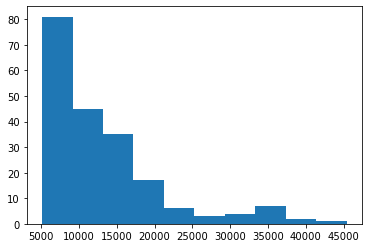

In [1416]:
# Câu 19: Vẽ biểu đồ thể hiện phân bố dữ liệu của cột price (histogram)
plt.hist(df['price'])
plt.show()

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_png"><img src="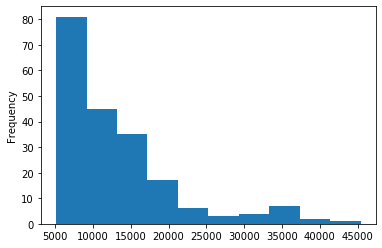
"></div>
  
</details>

In [1417]:
# Câu 20: Thể hiện hệ số tương quan của df
df2.corr()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.371250,-0.360233,-0.470606,-0.543304,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.579731,-0.286035,-0.665192,-0.698142,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.615006,-0.245852,-0.633531,-0.680635,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,-0.086941,-0.309913,-0.049800,-0.104812,0.135486
curb-weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.757994,-0.279350,-0.749543,-0.794889,0.834415
engine-size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.822649,-0.256753,-0.650546,-0.679571,0.872335
bore,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.566838,-0.267338,-0.582121,-0.591390,0.543154
stroke,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.097815,-0.063720,-0.034079,-0.034741,0.082267
horsepower,0.371250,0.579731,0.615006,-0.086941,0.757994,0.822649,0.566838,0.097815,1.000000,0.107882,-0.822138,-0.804587,0.809681
peak-rpm,-0.360233,-0.286035,-0.245852,-0.309913,-0.279350,-0.256753,-0.267338,-0.063720,0.107882,1.000000,-0.115358,-0.058605,-0.101542


<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>wheel-base</th>
      <th>length</th>
      <th>width</th>
      <th>height</th>
      <th>curb-weight</th>
      <th>engine-size</th>
      <th>bore</th>
      <th>stroke</th>
      <th>horsepower</th>
      <th>peak-rpm</th>
      <th>city-mpg</th>
      <th>highway-mpg</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>wheel-base</th>
      <td>1.000000</td>
      <td>0.876024</td>
      <td>0.814507</td>
      <td>0.590742</td>
      <td>0.782097</td>
      <td>0.572027</td>
      <td>0.493203</td>
      <td>0.157964</td>
      <td>0.371250</td>
      <td>-0.360233</td>
      <td>-0.470606</td>
      <td>-0.543304</td>
      <td>0.584642</td>
    </tr>
    <tr>
      <th>length</th>
      <td>0.876024</td>
      <td>1.000000</td>
      <td>0.857170</td>
      <td>0.492063</td>
      <td>0.880665</td>
      <td>0.685025</td>
      <td>0.608941</td>
      <td>0.123913</td>
      <td>0.579731</td>
      <td>-0.286035</td>
      <td>-0.665192</td>
      <td>-0.698142</td>
      <td>0.690628</td>
    </tr>
    <tr>
      <th>width</th>
      <td>0.814507</td>
      <td>0.857170</td>
      <td>1.000000</td>
      <td>0.306002</td>
      <td>0.866201</td>
      <td>0.729436</td>
      <td>0.544879</td>
      <td>0.188814</td>
      <td>0.615006</td>
      <td>-0.245852</td>
      <td>-0.633531</td>
      <td>-0.680635</td>
      <td>0.751265</td>
    </tr>
    <tr>
      <th>height</th>
      <td>0.590742</td>
      <td>0.492063</td>
      <td>0.306002</td>
      <td>1.000000</td>
      <td>0.307581</td>
      <td>0.074694</td>
      <td>0.180327</td>
      <td>-0.060822</td>
      <td>-0.086941</td>
      <td>-0.309913</td>
      <td>-0.049800</td>
      <td>-0.104812</td>
      <td>0.135486</td>
    </tr>
    <tr>
      <th>curb-weight</th>
      <td>0.782097</td>
      <td>0.880665</td>
      <td>0.866201</td>
      <td>0.307581</td>
      <td>1.000000</td>
      <td>0.849072</td>
      <td>0.644041</td>
      <td>0.167412</td>
      <td>0.757994</td>
      <td>-0.279350</td>
      <td>-0.749543</td>
      <td>-0.794889</td>
      <td>0.834415</td>
    </tr>
    <tr>
      <th>engine-size</th>
      <td>0.572027</td>
      <td>0.685025</td>
      <td>0.729436</td>
      <td>0.074694</td>
      <td>0.849072</td>
      <td>1.000000</td>
      <td>0.572516</td>
      <td>0.205806</td>
      <td>0.822649</td>
      <td>-0.256753</td>
      <td>-0.650546</td>
      <td>-0.679571</td>
      <td>0.872335</td>
    </tr>
    <tr>
      <th>bore</th>
      <td>0.493203</td>
      <td>0.608941</td>
      <td>0.544879</td>
      <td>0.180327</td>
      <td>0.644041</td>
      <td>0.572516</td>
      <td>1.000000</td>
      <td>-0.055390</td>
      <td>0.566838</td>
      <td>-0.267338</td>
      <td>-0.582121</td>
      <td>-0.591390</td>
      <td>0.543154</td>
    </tr>
    <tr>
      <th>stroke</th>
      <td>0.157964</td>
      <td>0.123913</td>
      <td>0.188814</td>
      <td>-0.060822</td>
      <td>0.167412</td>
      <td>0.205806</td>
      <td>-0.055390</td>
      <td>1.000000</td>
      <td>0.097815</td>
      <td>-0.063720</td>
      <td>-0.034079</td>
      <td>-0.034741</td>
      <td>0.082267</td>
    </tr>
    <tr>
      <th>horsepower</th>
      <td>0.371250</td>
      <td>0.579731</td>
      <td>0.615006</td>
      <td>-0.086941</td>
      <td>0.757994</td>
      <td>0.822649</td>
      <td>0.566838</td>
      <td>0.097815</td>
      <td>1.000000</td>
      <td>0.107882</td>
      <td>-0.822138</td>
      <td>-0.804587</td>
      <td>0.809681</td>
    </tr>
    <tr>
      <th>peak-rpm</th>
      <td>-0.360233</td>
      <td>-0.286035</td>
      <td>-0.245852</td>
      <td>-0.309913</td>
      <td>-0.279350</td>
      <td>-0.256753</td>
      <td>-0.267338</td>
      <td>-0.063720</td>
      <td>0.107882</td>
      <td>1.000000</td>
      <td>-0.115358</td>
      <td>-0.058605</td>
      <td>-0.101542</td>
    </tr>
    <tr>
      <th>city-mpg</th>
      <td>-0.470606</td>
      <td>-0.665192</td>
      <td>-0.633531</td>
      <td>-0.049800</td>
      <td>-0.749543</td>
      <td>-0.650546</td>
      <td>-0.582121</td>
      <td>-0.034079</td>
      <td>-0.822138</td>
      <td>-0.115358</td>
      <td>1.000000</td>
      <td>0.972044</td>
      <td>-0.686571</td>
    </tr>
    <tr>
      <th>highway-mpg</th>
      <td>-0.543304</td>
      <td>-0.698142</td>
      <td>-0.680635</td>
      <td>-0.104812</td>
      <td>-0.794889</td>
      <td>-0.679571</td>
      <td>-0.591390</td>
      <td>-0.034741</td>
      <td>-0.804587</td>
      <td>-0.058605</td>
      <td>0.972044</td>
      <td>1.000000</td>
      <td>-0.704692</td>
    </tr>
    <tr>
      <th>price</th>
      <td>0.584642</td>
      <td>0.690628</td>
      <td>0.751265</td>
      <td>0.135486</td>
      <td>0.834415</td>
      <td>0.872335</td>
      <td>0.543154</td>
      <td>0.082267</td>
      <td>0.809681</td>
      <td>-0.101542</td>
      <td>-0.686571</td>
      <td>-0.704692</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div></div>
  
</details>

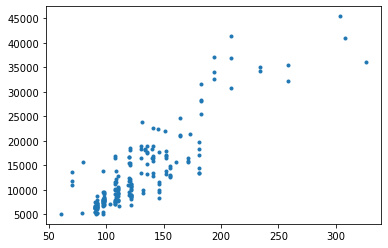

In [1418]:
# Câu 21: Vẽ biểu đồ thể hiện giá trị giữa 'engine-size' và 'price'
plt.scatter(df2['engine-size'],df2['price'],marker='.')
plt.show()

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
  <div class="output_subarea output_png"><img src="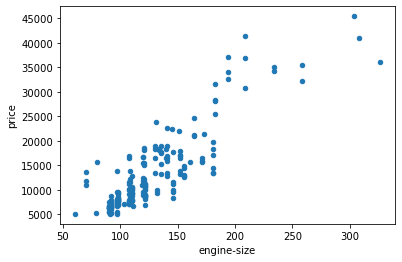
"></div>
  
</details>

[Text(0, 0, 'diesel'), Text(0, 0, 'gas')]

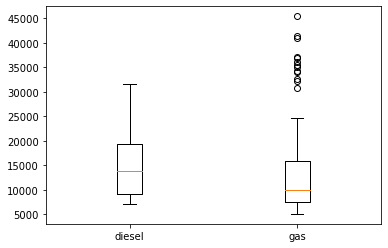

In [1430]:
# Câu 22: Vẽ biểu đồ boxplot thể hiện giá xe thay đổi như thế nào với từng loại body-style
data_gas = df2.loc[df2['fuel-type']=='gas']['price']
data_diesel = df2.loc[df2['fuel-type']=='diesel']['price']

data = {'diesel':data_diesel,'gas':data_gas}
fig,ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())

<details>
  <summary>Nhấn vào đây để xem kết quả!</summary>
<div class="output_subarea output_png">
    <img src="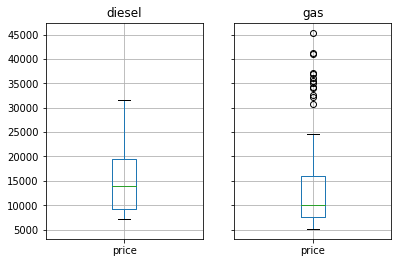
"></div>
  
</details>